In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carregando os dados baixados no dataframe 
df = pd.read_csv('/content/drive/MyDrive/Projeto_Banco_Pan_Grupo_1/CSVs/Anomes 11/ind engajado/clientes.csv')

In [ ]:
df.shape

(1702712, 13)

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df = df[df.anomes.isin([1,2,3,4])]

In [ ]:
#Uma matriz de correlação é uma tabela que indica os coeficientes de conexão entre os fatores. 
#Cada célula da tabela mostra a conexão entre os dois fatores. 
#O método .corr() do pandas cria uma matriz de correlação entre todas as colunas do dataframe utilizado

In [ ]:
#criando a matriz de correlação dos dados e limitando a relação para a coluna ind_engaj
df.corr()['ind_engaj']

anomes            0.008285
vlr_credito       0.015774
vlr_saldo         0.045383
num_atend_atrs    0.034279
vlr_score         0.026069
num_produtos      0.307134
num_atend         0.043166
qtd_oper          0.274493
qtd_reclm         0.006271
qtd_restr        -0.032742
cod_rating        0.140316
ind_engaj         1.000000
Name: ind_engaj, dtype: float64

In [ ]:
#Considerando qualquer valor acima de 0.05 um valor relevante de correlação, verifica-se que:
#As colunas vlr_saldo, vlr_score, num_produtos e qtd_oper tem uma correlação diretamente proporcional com o ind_engaj
#isto significa que quanto maior for o valor nessas colunas, o valor em ind_engaj tende a ser maior.
#As colunas qtd_restr e cod_rating tem uma relação inversamente proporcional com o ind_engaj.
#isto significa que quanto maior for o valor nessas colunas, o valor em ind_engaj tende a ser menor.

In [ ]:
#criando a matriz de correlação dos dados e limitando a relação para a coluna ind_atrito
df.corr()['ind_atrito']

KeyError: ignored

In [ ]:
#Considerando qualquer valor acima de 0.05 um valor relevante de correlação, verifica-se que:
  #As colunas qtd_reclm e num_atend tem uma relação diretamente proporcional com o ind_atrito.
  #isto significa que quanto maior for o valor nessas colunas, o valor em ind_atrito tende a ser maior.

In [ ]:
#aqui estou importanto o seaborn para biblioteca para plotar os gráficos
#Estou realizando o pairplot para que possamos ter uma ideia inicial de como os gráficos estão distribuidos
#para plotar, estou considerando apenas as colunas que possuem uma correlação diretamente proporcional com o ind_engaj
#obs: essa parte está demorando em torno de 5 minutos
import seaborn as sns
sns.pairplot(df, hue='ind_engaj', y_vars=['vlr_saldo', 'vlr_score', 'num_produtos','qtd_oper'], x_vars=['vlr_saldo', 'vlr_score', 'num_produtos','qtd_oper'])

KeyboardInterrupt: ignored

In [ ]:
#Aqui estou importando a biblioteca do svm
from sklearn import svm

#aqui estou importanto a biblioteca para separação dos dados em treino e teste
from sklearn.model_selection import train_test_split

In [ ]:
#Aqui estou definindo as colunas que serão as variáveis ( X ) e o valor que desejamos prever ( Y )
x = df[['anomes', 'vlr_saldo', 'vlr_score', 'num_produtos', 'qtd_oper', 'qtd_restr', 'cod_rating']]
y = df[['ind_engaj', 'vlr_saldo']]
y.drop(columns=["vlr_saldo"], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
x.columns

Index(['vlr_saldo', 'vlr_score', 'num_produtos', 'qtd_oper', 'qtd_restr',
       'cod_rating'],
      dtype='object')

In [ ]:
y.columns

Index(['ind_engaj'], dtype='object')

In [ ]:
#A train_test_split é uma função útil para partir os dados desejados em valores de treino e de teste
#Primeiro a função recebe os arrays que irá partir. No nosso caso X e Y, como segundo parâmetro é passada a porcentagem da separação para treino
#Por fim definimos a semente inicial da pseudo-aleatóriedade para que obtenhamos sempre os mesmos resultados
#A função irá retornar 4 valores: x de teste, x de treino, y de teste e y de treino, portando o padrão é receber todos esses valores por desempacotamento de variáveis

In [ ]:
#aqui estou definindo 25% dos dados para teste e a semente de geração do numero aleatório como sendo 65
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=65)

In [ ]:
#aqui estou instanciando o classificador iniciando-o com o C=1
# C é o parâmetro de regularização. O modelo de svm trabalha através de uma margem entre os dados a serem classificados.
#O parâmetro C é o que define a suavidade da margem. A suavidade será inversamente proporcional ao valor e o valor deve sempre ser positivo.
#O parâmetro Kernel define como será a curvatura da linha de separação dos dados. 'poly' significa Polinomial.
#Foi selecionado 'poly' pois como verificamos, os dados não tem uma separação de classes visualmente clara, então o método linear poderia ser menos eficiente
#Degree trata-se da quantidade de curvatura aceita pelo polinomio. default=3
svc = svm.SVC( kernel='poly',cache_size=7000)

In [ ]:
#Aqui estou ajustando o classificador de acordo com os dados de treino passados
svc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Nesta celula estou utilizando o classificador para prever o resultado a partir dos dados de testes que estou passando para ele
#aqui o retorno será um array com a categoria prevista para cada conjunto de caracteristicas passada
y_pred = svc.predict(x_test)

In [ ]:
#Para termos uma avaliação inicial do desempenho do modelo podemos usar o metodo .score() 
#Esse método retorna um valor entre 0 e 1 de demonstrando a acurácia do modelo, comparando os dados previstos com os constatados
svc.score(x_test, y_test)

0.75

In [ ]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,plot_roc_curve

recall = recall_score(y_test, y_pred)

recall

1.0

In [ ]:
precision = precision_score(y_test, y_pred)

precision

0.75

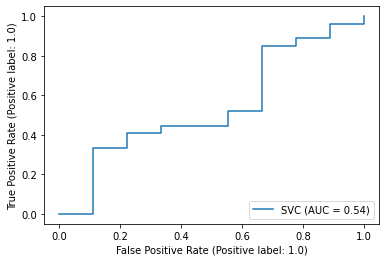

In [ ]:
plot_roc_curve(svc, x_test, y_test) 

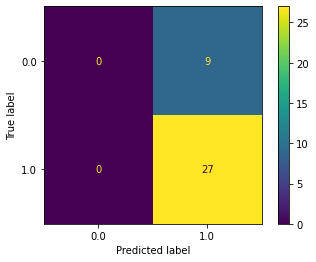

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svc, x_test, y_test)

In [ ]:
f1 = 2*precision*recall/(precision+recall)

f1

0.8571428571428571